In [10]:
import numpy as np

In [11]:
# load the mnist dataset

from dataset import fetch_mnist
X_train, Y_train, X_test, Y_test = fetch_mnist()

In [12]:
from torch import nn

class MnistNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28*28, 128)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(128, 10)
        self.act2 = nn.Softmax(dim=0)
    
    def forward(self, x):
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        #x = self.act2(x)
        return x



0.3386838436126709


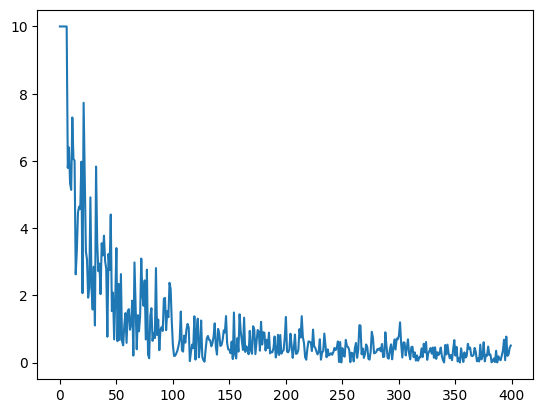

In [13]:
import torch
import math
import random
import matplotlib.pyplot as plt
import time

model = MnistNet()
batch_size = 32 # actuially makes it better

# train
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
loses = []
st = time.time()
for i in range(400):
    samp = np.random.randint(0, X_test.shape[0], size=(batch_size))
    inpt = torch.tensor(X_test[samp].reshape(-1, 28*28)).float()
    target = torch.tensor(Y_test[samp])
    optim.zero_grad()
    guess = model(inpt)
    #print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(min(loss.item(), 10))
et = time.time()
print(et-st)
plt.plot(loses)

In [14]:

model = MnistNet()
model.load_state_dict(torch.load("models/mnist_1.pt"))
model.eval()

MnistNet(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (act1): ReLU()
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (act2): Softmax(dim=0)
)

In [20]:
from tqdm import trange
corr = 0
for i in trange(len(X_test)):
    X = torch.tensor(X_test[i].reshape((-1, 28*28))).float()
    Y = Y_test[i]
    guess = torch.argmax(model(X))
    if Y == guess: corr += 1
print(f"accuracy: {corr/len(X_test)*100}%")

100%|██████████| 10000/10000 [00:00<00:00, 15935.41it/s]

accuracy: 91.23%


In [16]:
#torch.save(model.state_dict(), "models/mnist_1.pt")